In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
image2 = url_to_image("https://i.stack.imgur.com/8SX80.png")

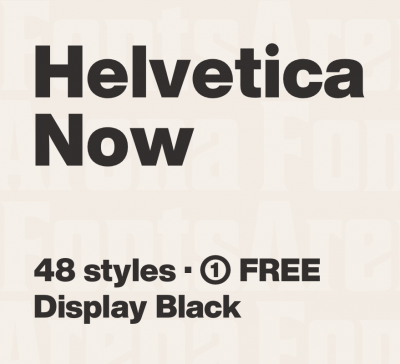

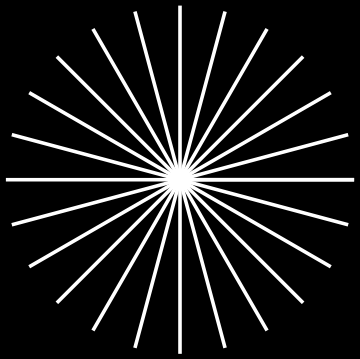

In [37]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2_imshow(image2)

In [0]:
edges = cv2.Canny(image,100,200)

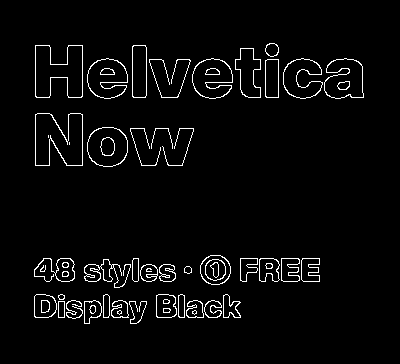

In [6]:
cv2_imshow(edges)

### Vertical Edge Detector

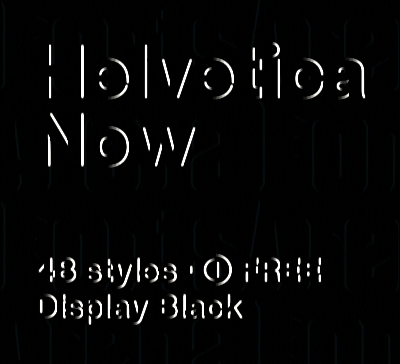

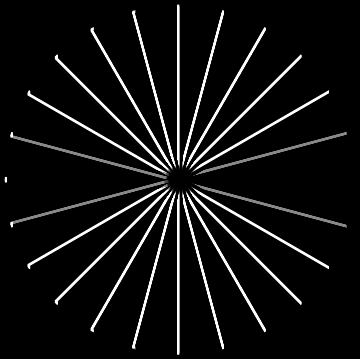

In [19]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

### Horizontal Edge Detector

The idea:
- A vertical direction where there is gradient from white->black is a horizontal edge. As such the gradient in our detector should also be in vertical direction. i.e top row is different from bottom row.
- Transpose vertical detector and try.

A horizontal edge will look like
```
[[0,0,0,0,0,0],
 [0,0,0,0,0,0],
 [1,1,1,1,1,1],
 [0,0,0,0,0,0],
 [0,0,0,0,0,0]]
```

When my horizontal kernel
```
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
```

is starting at 2,0 to 4,2 it will give -3 on (3,1) in result as such it is showing activation on a horizontal line, due to having a horizontal pattern in kernel.

In [0]:
formatter = lambda x:"%.2f"%(x)
formatter = np.vectorize(formatter)

In [9]:
temp_image = np.float32([[0.2,0.1,0.1,0.2,0.2,0.1],
 [0.1,0.1,0.2,0.2,0.1,0.5],
 [1,1,1,1,1,1],
 [0.1,0.2,0.1,0.1,0.1,0.2],
 [0,0.1,0.1,0.1,0.1,0.1]])
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
print(kernel)

dst = cv2.filter2D(temp_image,-1,kernel)
print("after runnning notice enhancement of horizontal edge")
print(formatter(dst))


print("Weird kernel 1: No enhancement since all pixels get multiplied similarly: everything blackens")
kernel = np.float32([[-1,-1,-1],[0,0,0],[0,0,0]])
print(kernel)

dst = cv2.filter2D(temp_image,-1,kernel)
print("after runnning")
print(formatter(dst))


print("Weird kernel 2: everything whitens")
kernel = np.float32([[1,1,1],[0,0,0],[0,0,0]])
print(kernel)

dst = cv2.filter2D(temp_image,-1,kernel)
print("after runnning")
print(formatter(dst))



[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
after runnning notice enhancement of horizontal edge
[['-0.00' '-0.00' '0.00' '-0.00' '0.00' '-0.00']
 ['2.60' '2.60' '2.60' '2.50' '2.50' '2.50']
 ['0.20' '-0.00' '-0.10' '-0.20' '-0.40' '-0.30']
 ['-2.80' '-2.80' '-2.70' '-2.70' '-2.70' '-2.70']
 ['-0.00' '-0.00' '0.00' '-0.00' '-0.00' '-0.00']]
Weird kernel 1: No enhancement since all pixels get multiplied similarly: everything blackens
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
after runnning
[['-0.30' '-0.40' '-0.50' '-0.50' '-0.80' '-0.70']
 ['-0.40' '-0.40' '-0.40' '-0.50' '-0.50' '-0.50']
 ['-0.30' '-0.40' '-0.50' '-0.50' '-0.80' '-0.70']
 ['-3.00' '-3.00' '-3.00' '-3.00' '-3.00' '-3.00']
 ['-0.50' '-0.40' '-0.40' '-0.30' '-0.40' '-0.40']]
Weird kernel 2: everything whitens
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
after runnning
[['0.30' '0.40' '0.50' '0.50' '0.80' '0.70']
 ['0.40' '0.40' '0.40' '0.50' '0.50' '0.50']
 ['0.30' '0.40' '0.50' '0.50' '0.80' '0.70']
 ['3.00' '3.00' '3.00'

[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


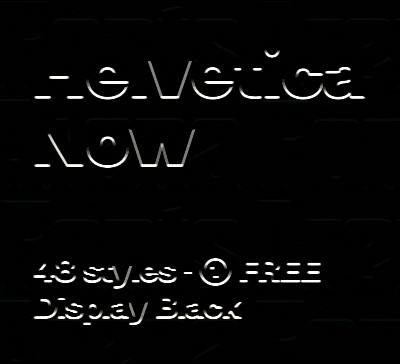

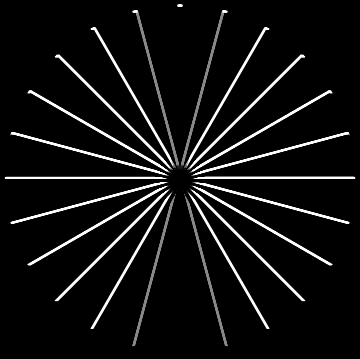

In [21]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


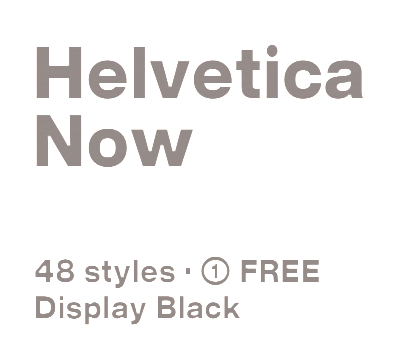

In [11]:
# Lets try something different.
kernel = np.float32([[1,1,1],[0,0,0],[0,0,0]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### 45 degree angle detector (+45 degree)

Given our above observations We understand
- What pattern we need to find, our kernel should be aligned in same direction
- Sum of kernel elements must be 0, else it will whiten/darken the image

so we make diagonal of 0s n top left as 1, bottom right as -1

[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]


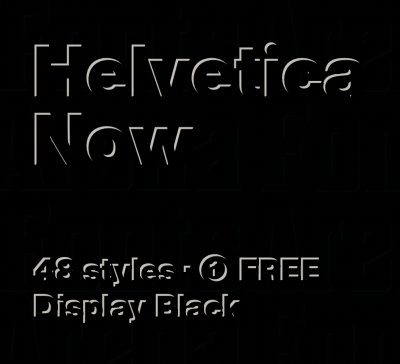

In [12]:

kernel = np.float32([[1,0,0],[0,0,0],[0,0,-1]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

Some horizontal edges are also visible, so we make the 45 degree gradient more prominent

[[ 1.   0.5  0. ]
 [ 0.5  0.  -0.5]
 [ 0.  -0.5 -1. ]]


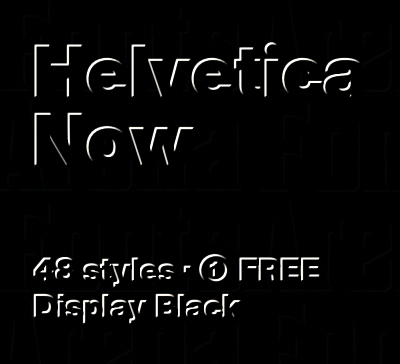

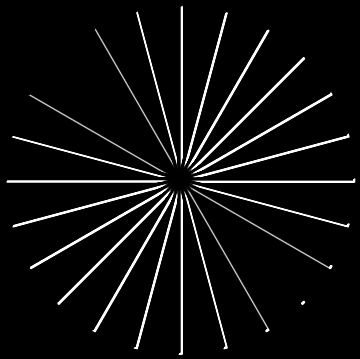

In [22]:

kernel = np.float32([[1,0.5,0],[0.5,0,-0.5],[0,-0.5,-1]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

[[ 1.  1.  0.]
 [ 1.  0. -1.]
 [ 0. -1. -1.]]


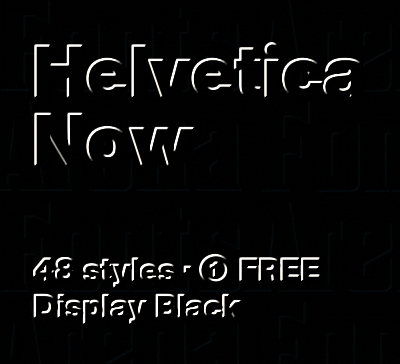

In [14]:

kernel = np.float32([[1,1,0],[1,0,-1],[0,-1,-1]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

[[ 2.   0.5  0. ]
 [ 0.5  0.  -0.5]
 [ 0.  -0.5 -2. ]]


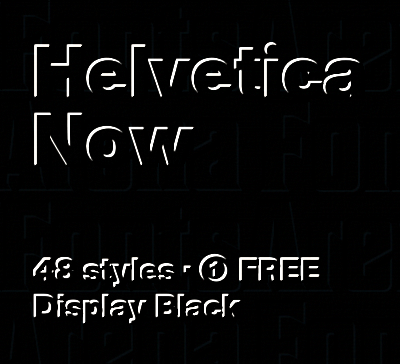

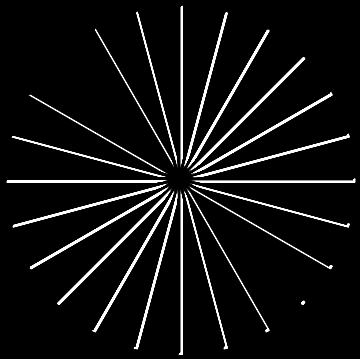

In [28]:
kernel = np.float32([[2,0.5,0],[0.5,0,-0.5],[0,-0.5,-2]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

https://stackoverflow.com/questions/8547127/how-to-detect-45-degree-edges-in-an-image

https://stackoverflow.com/questions/7624765/converting-an-opencv-image-to-black-and-white

### Blur Kernel

- Simple idea is that a kernel with all ones will basically average out information

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


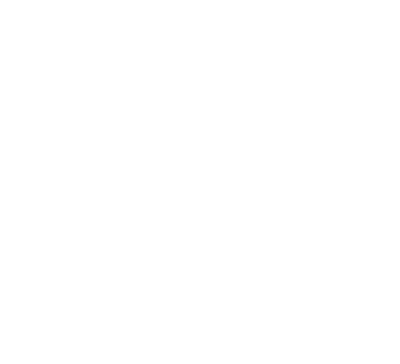

Min value of pixel =  255
So for a grayscale image it doesn't work as most pixels become over 255
For a black-n-white image it does work, as below


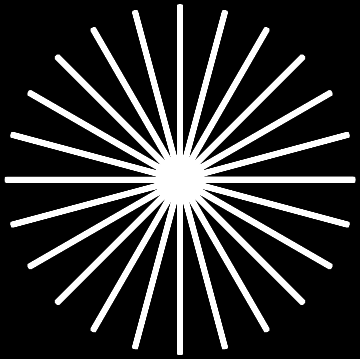

In [49]:
kernel = np.float32([[1,1,1],[1,1,1],[1,1,1]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
print("Min value of pixel = ",dst.min())

print("So for a grayscale image it doesn't work as most pixels become over 255")
print("="*80)
print("For a black-n-white image it does work, as below")

dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

ok so that doesn't work, probably too much averaging? 
Lets check
Also total kernel sum must be zero? We did not do that.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


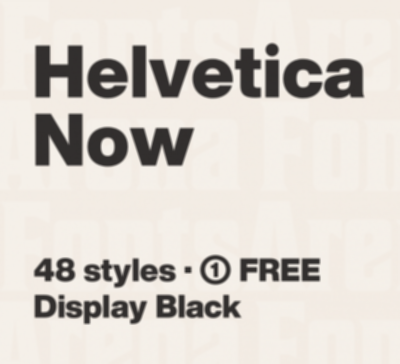

Min value of pixel =  45


In [52]:
kernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
print("Min value of pixel = ",dst.min())




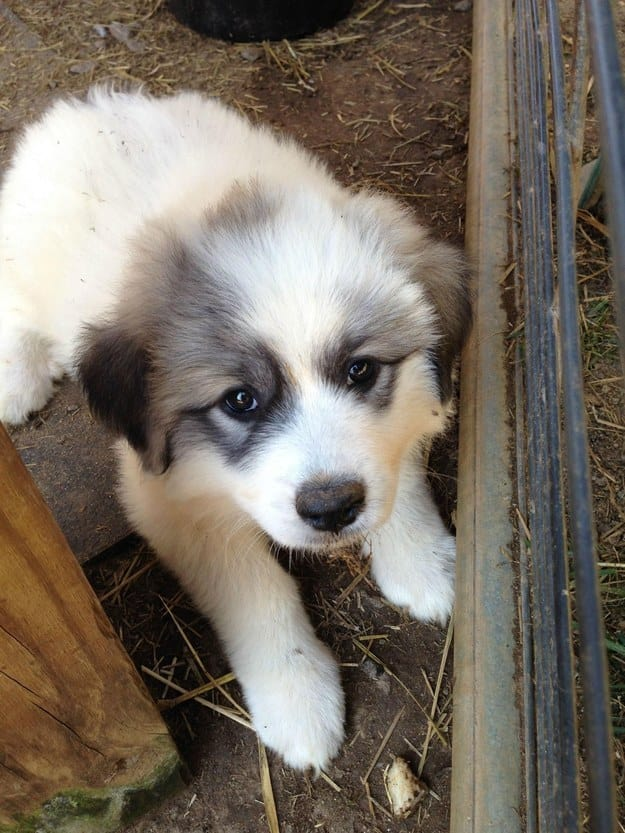

In [56]:
image3 = url_to_image("https://img.buzzfeed.com/buzzfeed-static/static/2015-02/2/11/enhanced/webdr12/enhanced-buzz-23480-1422894098-24.jpg?downsize=800:*&output-format=auto&output-quality=auto")
cv2_imshow(image3)

Try noticing the fur in the above and below image.
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


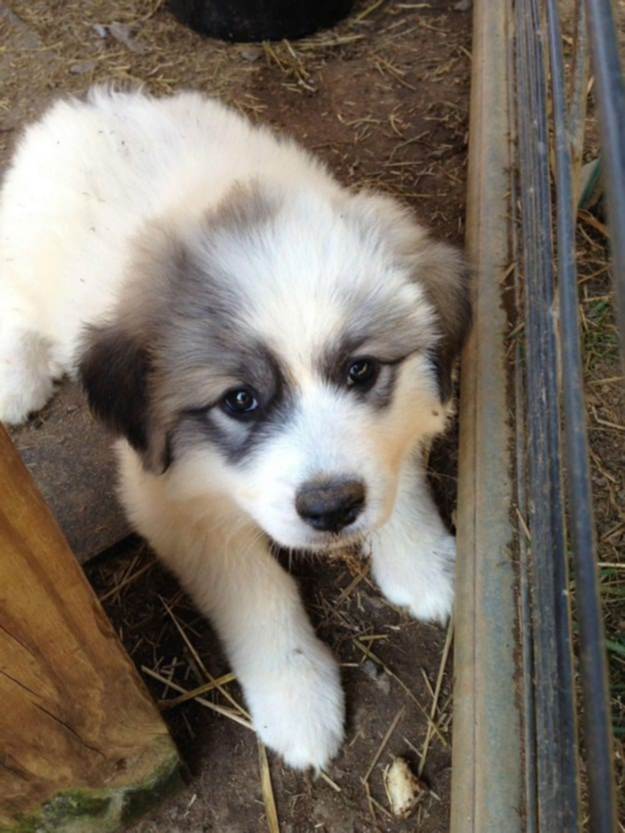

Min value of pixel =  0


In [58]:
print("Try noticing the fur in the above and below image.")

kernel = np.float32([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
print(kernel)

dst = cv2.filter2D(image3,-1,kernel)
cv2_imshow(dst)
print("Min value of pixel = ",dst.min())


Till now we noticed that blurs are good with a 1-sum kernel.
What if I make a zero sum kernel?
Well that doesn't work well, it just pushes all values towards zero! Its a good outline detector though!

[[-0.0625 -0.0625 -0.0625]
 [-0.0625  0.5    -0.0625]
 [-0.0625 -0.0625 -0.0625]]


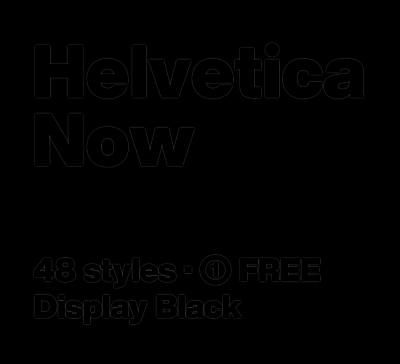

Min value of pixel =  0


In [60]:
kernel = np.float32([[-1/16,-1/16,-1/16],[-1/16,1/2,-1/16],[-1/16,-1/16,-1/16]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)
print("Min value of pixel = ",dst.min())

### Sharpen Kernel
We want to enhance edges basically.

So we subtract the surroundings, and add the current pixel (+ sign) to enhance the current pixel.

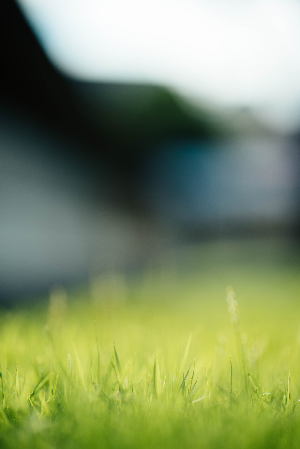

In [84]:
# "https://fotoram.io/upload/1/tool_blur/middle_slider_right_image.jpg"
# "https://www.facepixelizer.com/facepixelizerHelpImages/LanBlurred.jpg"
def resize(image,window_height = 300):
    aspect_ratio = float(image.shape[1])/float(image.shape[0])
    window_width = window_height/aspect_ratio
    image = cv2.resize(image, (int(window_height),int(window_width)))
    return image
image4 = url_to_image("https://images.unsplash.com/photo-1531273776218-7d1bd4db5447?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=2734&q=80")
image4 = resize(image4)
cv2_imshow(image4)

[[-0.0625 -0.0625 -0.0625]
 [-0.0625  1.5    -0.0625]
 [-0.0625 -0.0625 -0.0625]]


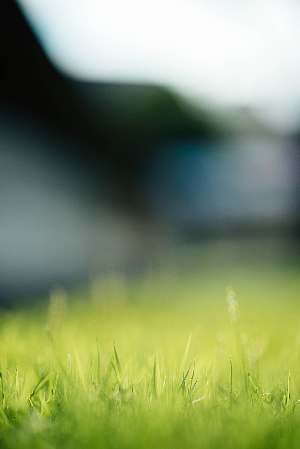

Do the sharpen again!!


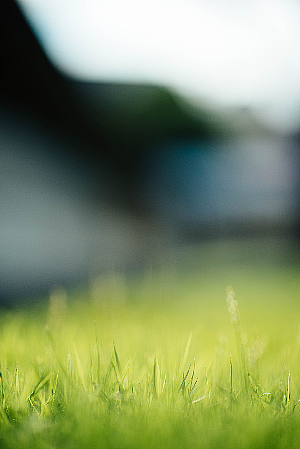

Sharpen one last time


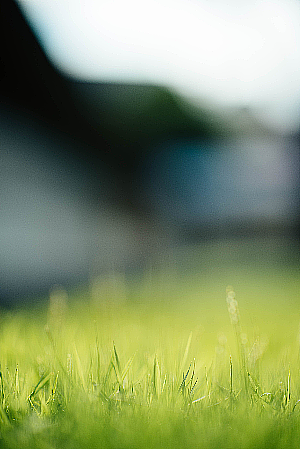

In [86]:
kernel = np.float32([[-1/16,-1/16,-1/16],[-1/16,1.5,-1/16],[-1/16,-1/16,-1/16]])
print(kernel)

dst = cv2.filter2D(image4,-1,kernel)
cv2_imshow(dst)
print("Do the sharpen again!!")
dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)
print("Sharpen one last time")
dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)

I am gonna sharpen 8 times in a loop now!, sharp, artifacts occuring!


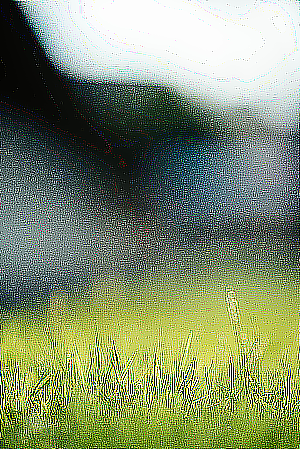

In [90]:
print("I am gonna sharpen 8 times in a loop now!, sharp, artifacts occuring!")
dst = cv2.filter2D(image4,-1,kernel)
for i in range(8):
  dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)

I am gonna sharpen 4 times in a loop now!, still sharp


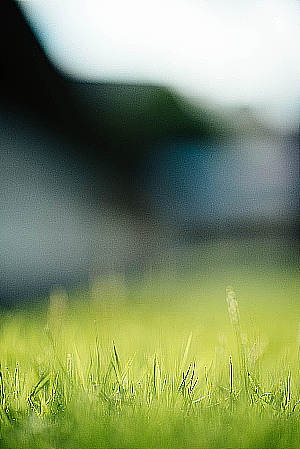

In [91]:
print("I am gonna sharpen 4 times in a loop now!, still sharp")
dst = cv2.filter2D(image4,-1,kernel)
for i in range(4):
  dst = cv2.filter2D(dst,-1,kernel)
cv2_imshow(dst)

### Identity Kernel

- Just ignore all side pixels and put the middle 1 as 1.


[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


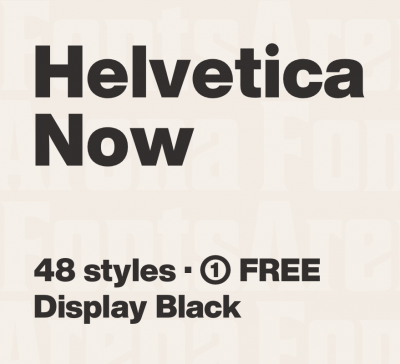

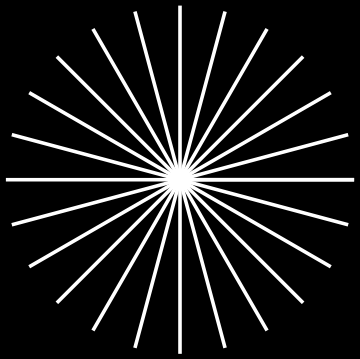

In [95]:
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])
print(kernel)

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)


dst = cv2.filter2D(image2,-1,kernel)
cv2_imshow(dst)

### Code for Assignment 1B

In [93]:
ctr = 0
for i in range(199,0,-2):
  ctr = ctr + 1
  if i>1:
    print(str(i)+'->(3x3)->', end='')
  else:
    print(str(i), end='')  
print("\nTotal iterations = ",ctr)

199->(3x3)->197->(3x3)->195->(3x3)->193->(3x3)->191->(3x3)->189->(3x3)->187->(3x3)->185->(3x3)->183->(3x3)->181->(3x3)->179->(3x3)->177->(3x3)->175->(3x3)->173->(3x3)->171->(3x3)->169->(3x3)->167->(3x3)->165->(3x3)->163->(3x3)->161->(3x3)->159->(3x3)->157->(3x3)->155->(3x3)->153->(3x3)->151->(3x3)->149->(3x3)->147->(3x3)->145->(3x3)->143->(3x3)->141->(3x3)->139->(3x3)->137->(3x3)->135->(3x3)->133->(3x3)->131->(3x3)->129->(3x3)->127->(3x3)->125->(3x3)->123->(3x3)->121->(3x3)->119->(3x3)->117->(3x3)->115->(3x3)->113->(3x3)->111->(3x3)->109->(3x3)->107->(3x3)->105->(3x3)->103->(3x3)->101->(3x3)->99->(3x3)->97->(3x3)->95->(3x3)->93->(3x3)->91->(3x3)->89->(3x3)->87->(3x3)->85->(3x3)->83->(3x3)->81->(3x3)->79->(3x3)->77->(3x3)->75->(3x3)->73->(3x3)->71->(3x3)->69->(3x3)->67->(3x3)->65->(3x3)->63->(3x3)->61->(3x3)->59->(3x3)->57->(3x3)->55->(3x3)->53->(3x3)->51->(3x3)->49->(3x3)->47->(3x3)->45->(3x3)->43->(3x3)->41->(3x3)->39->(3x3)->37->(3x3)->35->(3x3)->33->(3x3)->31->(3x3)->29->(3x3)->27->